In [24]:
import numpy as np
import pandas as pd
from sklearn import linear_model


In [26]:
data_df=pd.read_csv(r"C:\Users\suraj\Downloads\auto-mpg.csv")
data_df


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [28]:
data_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [30]:
import math
import pandas as pd

# Convert horsepower to numeric, coercing errors(non numeric values are replaced by Nan)
data_df['horsepower'] = pd.to_numeric(data_df['horsepower'], errors='coerce')

# Fill NaN values with the median 
median_horsepower = math.floor(data_df['horsepower'].median(skipna=True))

# Output the result
print(f"Median horsepower (floored): {median_horsepower}")


Median horsepower (floored): 93


In [32]:
data_df.horsepower=data_df.horsepower.fillna(median_horsepower)
data_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [37]:
from sklearn.preprocessing import StandardScaler

# Define the numeric columns for scaling
numeric_columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']

# Initialize and apply the scaler
scaler = StandardScaler()
data_df[numeric_columns] = scaler.fit_transform(data_df[numeric_columns])

# Check the standardized data
print(data_df.head())




        mpg  cylinders  displacement  horsepower    weight  acceleration  \
0 -0.706439   1.498191      1.090604    0.673277  0.630870     -1.295498   
1 -1.090751   1.498191      1.503514    1.590065  0.854333     -1.477038   
2 -0.706439   1.498191      1.196232    1.197156  0.550470     -1.658577   
3 -0.962647   1.498191      1.061796    1.197156  0.546923     -1.295498   
4 -0.834543   1.498191      1.042591    0.935216  0.565841     -1.840117   

   model year    origin                   car name  
0   -1.627426 -0.715145  chevrolet chevelle malibu  
1   -1.627426 -0.715145          buick skylark 320  
2   -1.627426 -0.715145         plymouth satellite  
3   -1.627426 -0.715145              amc rebel sst  
4   -1.627426 -0.715145                ford torino  


In [39]:
reg=linear_model.LinearRegression()
reg.fit(data_df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']],data_df.mpg)


LinearRegression()

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# Drop 'car name' from both training and test sets
X = data_df.drop(['mpg', 'car name'], axis=1)  # Exclude 'mpg' and 'car name'
y = data_df['mpg']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

# Train the model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

# Make predictions on the test set
predictions = reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


X_train shape: (318, 7), X_test shape: (80, 7)
y_train shape: (318,), y_test shape: (80,)
Mean Squared Error: 0.13453234858028967
R² Score: 0.8475279622442722


In [60]:
reg

LinearRegression()

In [43]:
reg.intercept_

-0.002207763906022531

In [45]:
# 1. Print the model's intercept and coefficients
print(f"Intercept: {reg.intercept_}")
print(f"Coefficients: {reg.coef_}")

Intercept: -0.002207763906022531
Coefficients: [-0.03414512  0.189836   -0.06478448 -0.73081854  0.02417302  0.37605172
  0.13580316]


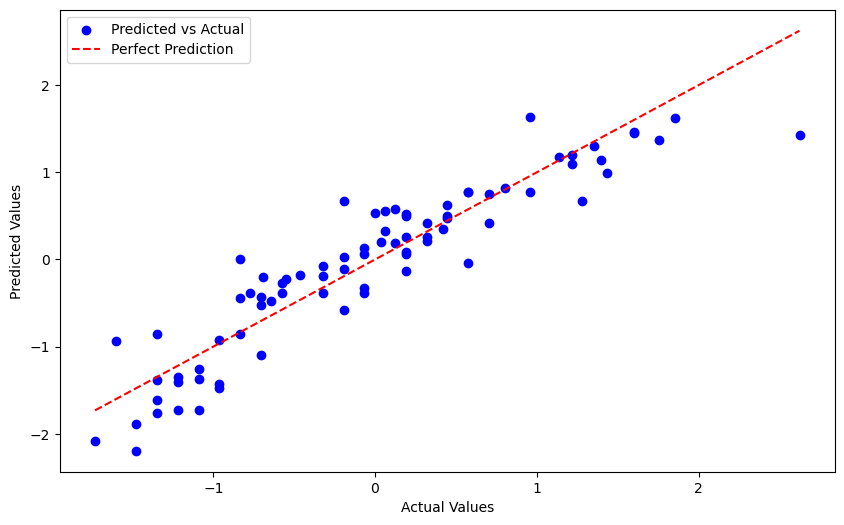

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

